# Exercise 3 - Linear regression optimisation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

a) Read the data in separate variables for the training and test sets.

In [2]:
dataset_train = pd.read_csv('overfitting_train.csv')
dataset_test = pd.read_csv('overfitting_test.csv')

In [3]:
dataset_train.head()

x         y
0 -1.000000 -1.859783
1  0.333333  2.768337
2  1.666667  3.246021
3  3.000000  1.784168
4  4.333333  2.175140

In [4]:
X_train = dataset_train['x'].values
y_train = dataset_train['y'].values
X_test = dataset_test['x'].values
y_test = dataset_test['y'].values

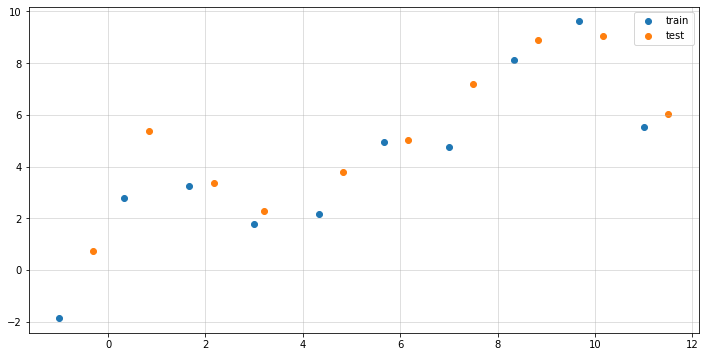

In [5]:
plt.figure(figsize=(12,6))
plt.grid(alpha=0.5)
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)
plt.legend(['train', 'test']);

b) Define a cost function
$J(θ)$
that will allow you to compute the cost on the training and
cross-validation sets.


$$J(\theta) = \frac{1}{2N} \sum_{n=1}^{N} (h_{\theta}(\mathbf{x}_{n}) - y_{n})^{2}$$

where $h_{\theta}(\mathbf{x}_{n})$ is your prediction.

In [6]:
def compute_cost(y_pred, y_true):
    N = y_pred.shape[0]
    return (1.0 / (2.0 * N)) * np.sum((y_pred - y_true)**2)

c) Perform the training for increasing orders $O= 1 ,..., 10$.

You can use any training method developed in the previous practical work. Using the [normal equation](http://mlwiki.org/index.php/Normal_Equation) is probably the easiest choice.

In [11]:
# TODO: implement the training method. The pseudo-code here is mostly for the normal equation. Adapt to your needs.

def fit(X_train: np.array, y_train: np.array, order: float) -> np.array:

    thetas = np.polyfit(X_train, y_train, deg=order)
    return thetas

def predict(thetas: np.array, X: np.array) -> np.array:
    y_pred = 0
    h = np.poly1d(np.flip(thetas))
    y_pred = h(X)
    return y_pred

Order=1; cost on train set: 1.41; cost on test set: 1.68
Order=2; cost on train set: 298.56; cost on test set: 362.89
Order=3; cost on train set: 28612.34; cost on test set: 38051.93
Order=4; cost on train set: 72401458.41; cost on test set: 105170095.72
Order=5; cost on train set: 8274930113.75; cost on test set: 13097518525.51
Order=6; cost on train set: 1574388828605.00; cost on test set: 2724841287265.93
Order=7; cost on train set: 132033940479620.50; cost on test set: 248210318110542.91


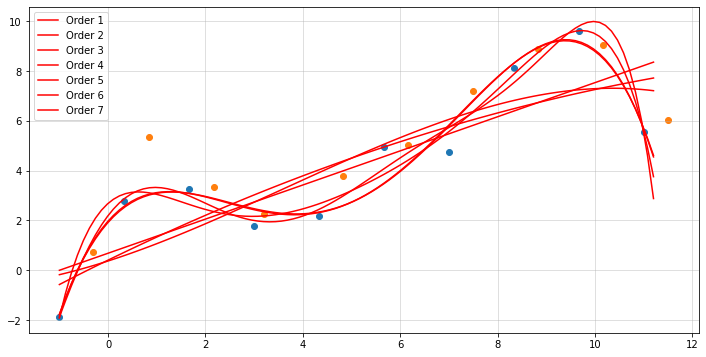

In [26]:
plt.figure(figsize=(12,6))
plt.grid(alpha=0.5)
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)

x_unseen = np.linspace(-1,11.2, 100)

train_cost_curve = []
test_cost_curve = []
for order in range(1,8):

    thetas = fit(X_train, y_train,order)  
    h = np.poly1d(thetas)
    y_hat = h(x_unseen)
    plt.plot(x_unseen,y_hat, color='red')
    
    # Test on train set
    y_pred=  predict(thetas, X_train)
    cost_train = compute_cost(y_pred, y_train)
    
    # Test on test set
    y_pred=  predict(thetas, X_test)
    cost_test = compute_cost(y_pred, y_test)

    print(f"Order={order}; cost on train set: {cost_train:.2f}; cost on test set: {cost_test:.2f}")


plt.legend([f"Order {i}" for i in range(1,8)]);

e) Plot the evolution of the costs
$J_{train}(θ)$ and $J_{cv}(θ)$
as a function of the order O.

[0.68464492 0.68616926]
[-0.02681592  0.95280416  0.40907137]
[-0.00661508  0.0724103   0.62895917  0.37452595]
[-0.01159073  0.22519947 -1.24378119  2.20014666  1.92278956]
[ 8.58712545e-05 -1.37375088e-02  2.42723563e-01 -1.29196451e+00
  2.20701883e+00  1.97589015e+00]
[-3.60754564e-04  1.09085082e-02 -1.29415828e-01  7.52517134e-01
 -1.98812324e+00  1.71665580e+00  2.68566767e+00]
[-9.04753107e-05  2.80588131e-03 -3.10264117e-02  1.27298200e-01
  7.08721210e-02 -1.60167146e+00  2.56141529e+00  2.19625762e+00]


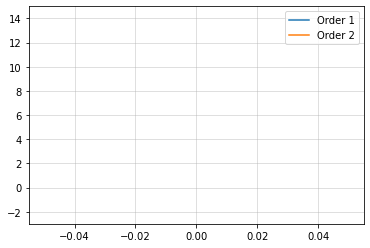

In [53]:
# plt.figure(figsize=(12,6))
plt.grid(alpha=0.5)
plt.plot(train_cost_curve)
plt.plot(test_cost_curve)
plt.ylim(-3, 15)
plt.legend(['train', 'test']);

def compute_jcost(x, y, theta):
    x_1 = [[row] for row in x]
    X = np.append(np.ones([len(y),1]),x_1, axis=1)
    return np.sum(np.square(np.matmul(X, theta) - y)) / (2 * len(y))

j_train = []
j_test = []
for order in range(1,8):

    thetas = fit(X_train, y_train,order)  
    
    # Test on train set
    print(thetas)
    #j_train.append(compute_jcost(X_train, y_train, thetas))

    # Test on test set
    #j_test.append(compute_jcost(X_test, y_test, thetas))
    
    # matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 2)
    # error with matmul ???????? :(

#plt.plot(range(1,8), j_train)
# plt.plot(range(1,8), j_test)

plt.legend([f"Order {i}" for i in range(1,8)]);
# TODO: or adapt to your own method of costs computation

**f) What is your best model according to these costs ? Comment your answer.**

Not working :(

**g) Would you still choose the model with the lowest cost for production?**

Not working :(

**h) Explain how under/over-fitting is involved here.**

With a big order, the train set has a good accuracy, But it's not good for the test set (and the other set, production set !). The function try to match every point of training, that's bad. In the other case, With a small order, there is a 